https://programmers.co.kr/learn/courses/30/lessons/92334

신입사원 무지는 게시판 불량 이용자를 신고하고 처리 결과를 메일로 발송하는 시스템을 개발하려 합니다. 무지가 개발하려는 시스템은 다음과 같습니다.

- 각 유저는 한 번에 한 명의 유저를 신고할 수 있습니다.
    - 신고 횟수에 제한은 없습니다. 서로 다른 유저를 계속해서 신고할 수 있습니다.
    - 한 유저를 여러 번 신고할 수도 있지만, 동일한 유저에 대한 신고 횟수는 1회로 처리됩니다.
- k번 이상 신고된 유저는 게시판 이용이 정지되며, 해당 유저를 신고한 모든 유저에게 정지 사실을 메일로 발송합니다.
    - 유저가 신고한 모든 내용을 취합하여 마지막에 한꺼번에 게시판 이용 정지를 시키면서 정지 메일을 발송합니다.
    
다음은 전체 유저 목록이 ["muzi", "frodo", "apeach", "neo"]이고, k = 2(즉, 2번 이상 신고당하면 이용 정지)인 경우의 예시입니다.

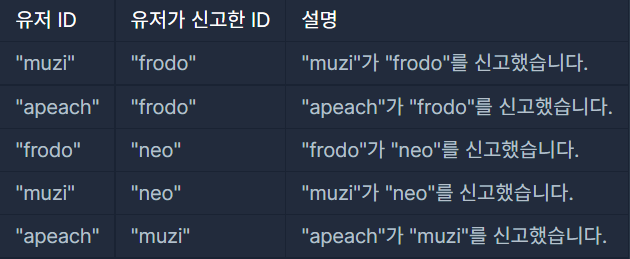

각 유저별로 신고당한 횟수는 다음과 같습니다.

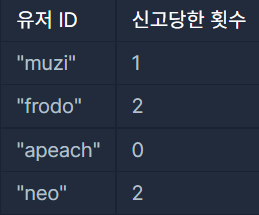

위 예시에서는 2번 이상 신고당한 "frodo"와 "neo"의 게시판 이용이 정지됩니다. 이때, 각 유저별로 신고한 아이디와 정지된 아이디를 정리하면 다음과 같습니다.

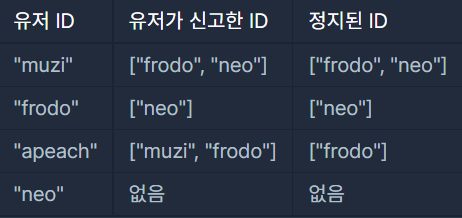

따라서 "muzi"는 처리 결과 메일을 2회, "frodo"와 "apeach"는 각각 처리 결과 메일을 1회 받게 됩니다.

이용자의 ID가 담긴 문자열 배열 id_list, 각 이용자가 신고한 이용자의 ID 정보가 담긴 문자열 배열 report, 정지 기준이 되는 신고 횟수 k가 매개변수로 주어질 때, 각 유저별로 처리 결과 메일을 받은 횟수를 배열에 담아 return 하도록 solution 함수를 완성해주세요.

제한사항
- 2 ≤ id_list의 길이 ≤ 1,000
    - 1 ≤ id_list의 원소 길이 ≤ 10
    - id_list의 원소는 이용자의 id를 나타내는 문자열이며 알파벳 소문자로만 이루어져 있습니다.
    - id_list에는 같은 아이디가 중복해서 들어있지 않습니다.
- 1 ≤ report의 길이 ≤ 200,000
    - 3 ≤ report의 원소 길이 ≤ 21
    - report의 원소는 "이용자id 신고한id"형태의 문자열입니다.
    - 예를 들어 "muzi frodo"의 경우 "muzi"가 "frodo"를 신고했다는 의미입니다.
    - id는 알파벳 소문자로만 이루어져 있습니다.
    - 이용자id와 신고한id는 공백(스페이스)하나로 구분되어 있습니다.
    - 자기 자신을 신고하는 경우는 없습니다.
- 1 ≤ k ≤ 200, k는 자연수입니다.
- return 하는 배열은 id_list에 담긴 id 순서대로 각 유저가 받은 결과 메일 수를 담으면 됩니다.

In [1]:
id_list = ["muzi", "frodo", "apeach", "neo"]
report = ["muzi frodo", "muzi frodo", "apeach frodo","frodo neo","muzi neo","apeach muzi"]
k = 2

In [ ]:
id_list = ["con", "ryan"]
report = ["ryan con", "ryan con", "ryan con", "ryan con"]
k = 3

In [2]:
# 유저가 신고한 ID 저장
report_dic = {}
for s in report:
    user = s.split()
    if user[0] in report_dic:
        report_dic[user[0]].add(user[1])
    else:
        report_dic[user[0]] = {user[1]}

In [3]:
report_dic

{'muzi': {'frodo', 'neo'}, 'apeach': {'frodo', 'muzi'}, 'frodo': {'neo'}}

In [4]:
# 신고당한 횟수 카운트
reported_cnt = [0]* len(id_list)
for reported in report_dic.values():
    for reported_name in reported:
        reported_cnt[id_list.index(reported_name)] +=1

In [5]:
reported_cnt

[1, 2, 0, 2]

In [6]:
# 정지된 ID 저장
limited_id = []
for i, K in enumerate(reported_cnt):
    if K >= k:
        limited_id.append(id_list[i])

In [7]:
limited_id

['frodo', 'neo']

In [8]:
# result
answer = [0]* len(id_list)
for key, values in report_dic.items():
    for reported_name in values:
        if reported_name in limited_id:
            answer[id_list.index(key)] += 1

In [9]:
answer

[2, 1, 1, 0]

solution

In [ ]:
def solution(id_list, report, k):
    # 유저가 신고한 ID 저장
    report_dic = {}
    for s in report:
        user = s.split()
        if user[0] in report_dic:
            report_dic[user[0]].add(user[1])
        else:
            report_dic[user[0]] = {user[1]}
            
    # 신고당한 횟수 카운트
    reported_cnt = [0]* len(id_list)
    for reported in report_dic.values():
        for reported_name in reported:
            reported_cnt[id_list.index(reported_name)] +=1    
    
    # 정지된 ID 저장
    limited_id = []
    for i, K in enumerate(reported_cnt):
        if K >= k:
            limited_id.append(id_list[i])
            
    # result
    answer = [0]* len(id_list)
    for key, values in report_dic.items():
        for reported_name in values:
            if reported_name in limited_id:
                answer[id_list.index(key)] += 1
    
    return answer

다른 사람 코드

In [ ]:
def solution(id_list, report, k):
    answer = [0] * len(id_list)    
    reports = {x : 0 for x in id_list}

    for r in set(report):
        reports[r.split()[1]] += 1

    for r in set(report):
        if reports[r.split()[1]] >= k:
            answer[id_list.index(r.split()[0])] += 1

    return answer